In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('breast_cancer.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Colunas terminadas em:
_mean: A média das medições para aquela característica.

_se: O erro padrão (standard error), que mede o desvio padrão da distribuição de amostragem. Em termos simples, indica a variabilidade da característica.

_worst: O pior (ou "maior") valor da característica, que é o valor mais extremo observado em relação ao tumor.

Colunas:


id: Um identificador único para cada paciente ou amostra. (será dropada)

diagnosis: O diagnóstico da amostra. M significa Maligno e B significa Benigno.

radius (raio): A média das distâncias do centro aos pontos do perímetro.

texture (textura): O desvio padrão dos valores de escala de cinza da superfície.

perimeter (perímetro): O perímetro do núcleo celular.

area (área): A área do núcleo celular.

smoothness (suavidade): A suavidade das variações de comprimento do raio ao longo do perímetro.

compactness (compacidade): Medida calculada como (perímetro^2 / área - 1.0).

concavity (concavidade): A gravidade das partes côncavas do contorno.

concave points (pontos côncavos): O número de porções côncavas no contorno.

symmetry (simetria): A simetria do núcleo.

fractal_dimension (dimensão fractal): Uma medida da "complexidade" do contorno do núcleo.

Unamed 32: Será dropada.

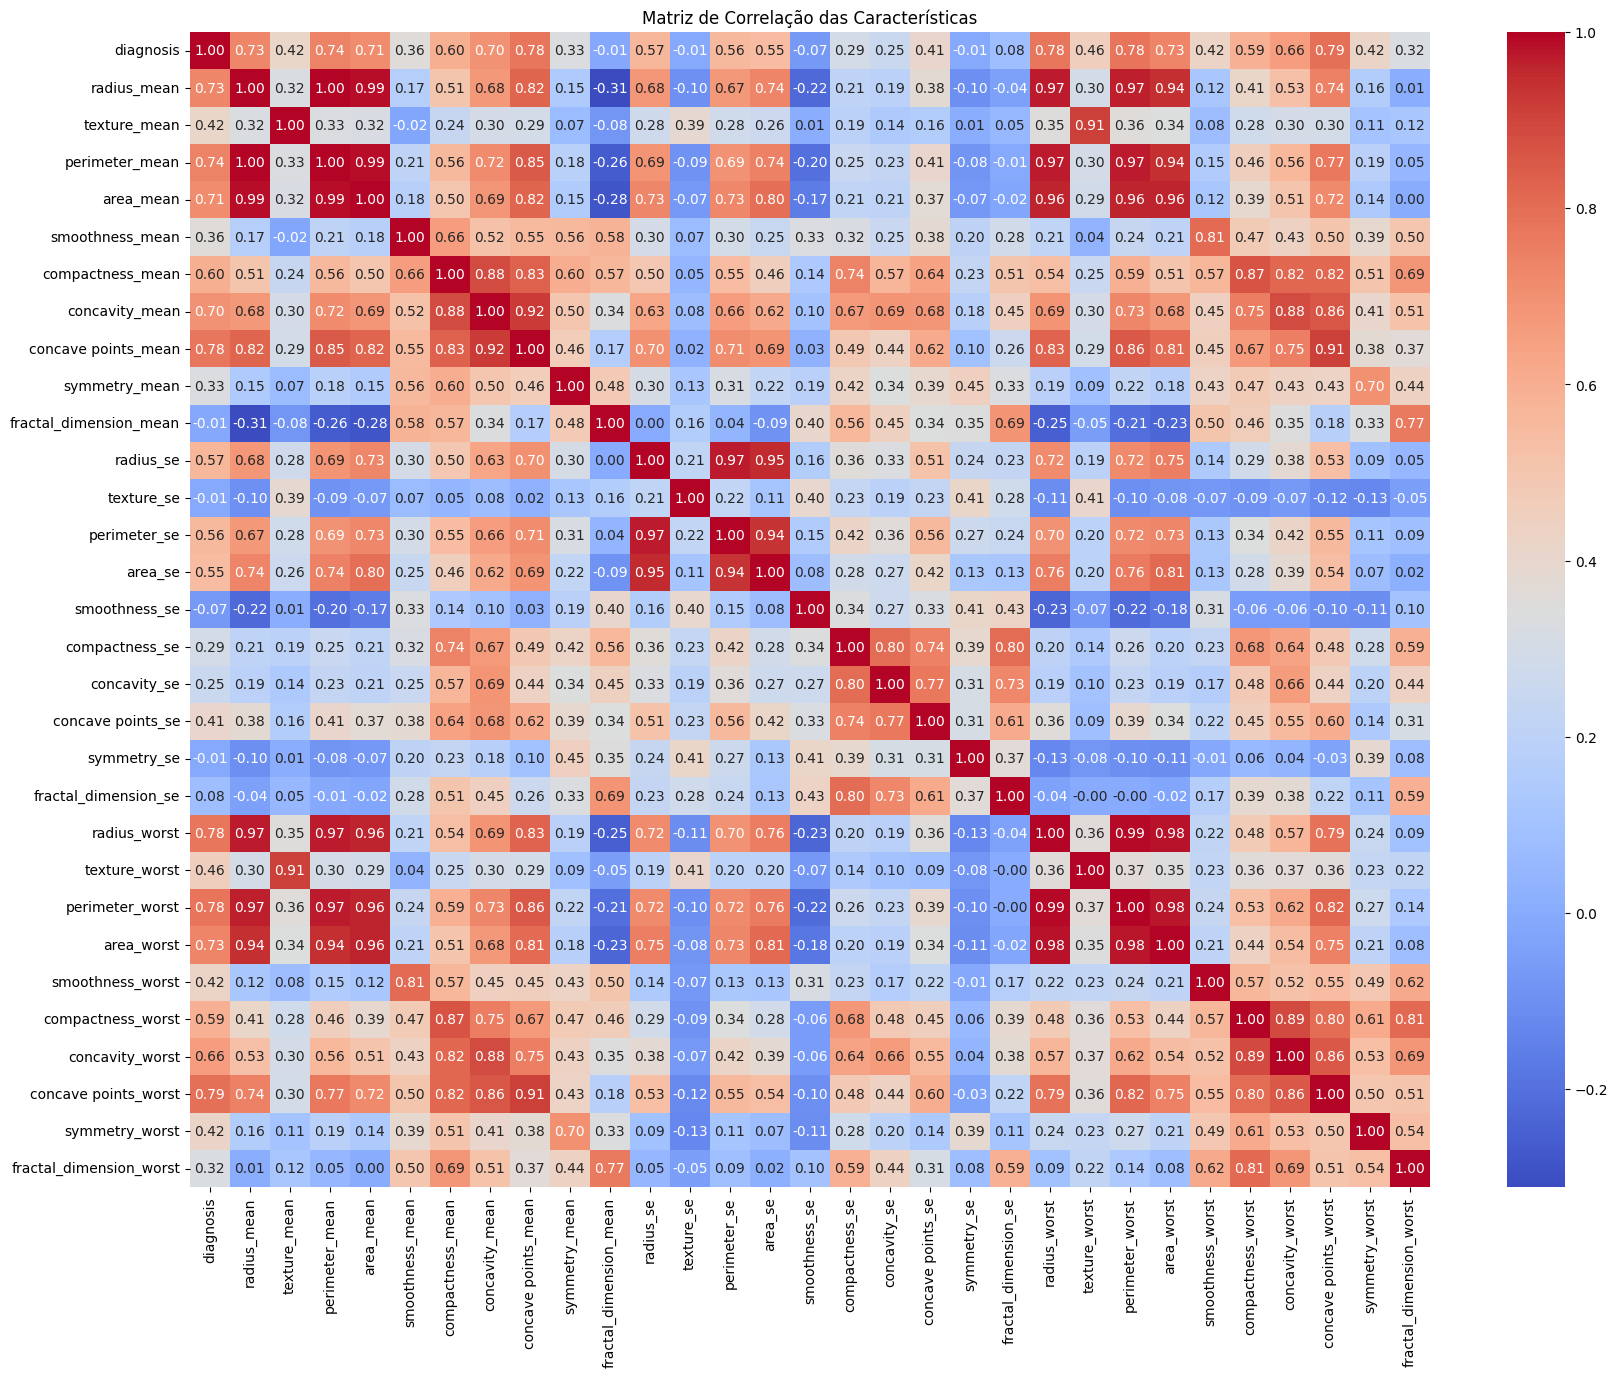

In [5]:
# Drop 
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Criando uma matriz de correlação
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Características')
plt.show()


# Nota-se a alta correlação entre variáveis que indicam tamanho do tumor (raio, perímetro e área) além das derivações dos mesmos.

# Faremos uma análise inicial com todas as variáveis e, depois, se necessário, uma redução de dimensionalidade.

In [8]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Separação base treino-teste
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo 
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
# Métricas do modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:\n", conf_matrix)
class_report = classification_report(y_test, y_pred)
print("\nRelatório de Classificação:\n", class_report)

Acurácia do modelo: 0.96

Matriz de Confusão:
 [[70  1]
 [ 3 40]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# O modelo teve um desempenho bom, entretanto os 3 falsos negativos (inferior esquerdo) na matriz de confusão merecem atenção.
    Esses falsos negativos indicam que o modelo previu como benigno o tumor que na realidade era maligno.
    Alguns ajustes serão propostos para melhorar, especificamente, essa questão.

In [10]:
# Tentativa 1 - ajustando hiperparâmetros
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Grid
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [5, 10, None], 
    'min_samples_split': [2, 5, 10]  
}

# Criamos o modelo base
base_model = RandomForestClassifier(random_state=42)

# Selecionando Recall como métrica de destaque desejado
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Melhores encontrados
print("Melhores parâmetros encontrados: ", grid_search.best_params_)
print("Melhor recall com a validação cruzada: ", grid_search.best_score_)

Melhores parâmetros encontrados:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Melhor recall com a validação cruzada:  0.9349376114081996


In [11]:
# Treinar modelo otimizado
optimized_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, random_state=42)

# Modelo otimizado com os dados de treino
optimized_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [12]:
# Fazemos previsões nos dados de teste com o novo modelo
y_pred_optimized = optimized_model.predict(X_test)

# Calcula a acurácia
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Nova acurácia do modelo: {accuracy_optimized:.2f}")
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
print("\nNova Matriz de Confusão:\n", conf_matrix_optimized)
class_report_optimized = classification_report(y_test, y_pred_optimized)
print("\nNovo Relatório de Classificação:\n", class_report_optimized)

Nova acurácia do modelo: 0.96

Nova Matriz de Confusão:
 [[70  1]
 [ 3 40]]

Novo Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Não houve mudança com ajustes de hiperparâmetros.
    Tentaremos agora um balanceamento de classes, seguido por uma análise de características e, por fim, mudança do modelo preditivo.
    

In [15]:
# Balanceamento via SMOTE
from imblearn.over_sampling import SMOTE

# Instancia o SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print('\nContagem de classes após o SMOTE:')
print(pd.Series(y_train_res).value_counts())


Contagem de classes após o SMOTE:
diagnosis
0    286
1    286
Name: count, dtype: int64


In [16]:
# Aplicando o modelo com as classes balanceadas
optimized_model_smote = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, random_state=42)

# Treina o modelo nos dados de treino balanceados
optimized_model_smote.fit(X_train_res, y_train_res)

# Métricas
y_pred_smote = optimized_model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Acurácia do modelo com SMOTE: {accuracy_smote:.2f}")
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
print("\nMatriz de Confusão com SMOTE:\n", conf_matrix_smote)
class_report_smote = classification_report(y_test, y_pred_smote)
print("\nRelatório de Classificação com SMOTE:\n", class_report_smote)

Acurácia do modelo com SMOTE: 0.96

Matriz de Confusão com SMOTE:
 [[69  2]
 [ 2 41]]

Relatório de Classificação com SMOTE:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# Houve uma melhora no Recall (objetivo desejado)
    Entretanto, os dois casos falsos negativos ainda são bem preocupantes

Top 10 Características mais importantes:
 area_worst              0.132652
perimeter_worst         0.129078
concave points_mean     0.127448
concave points_worst    0.118919
concavity_mean          0.063727
radius_worst            0.062146
concavity_worst         0.045507
area_mean               0.044831
radius_mean             0.039629
perimeter_mean          0.037794
dtype: float64


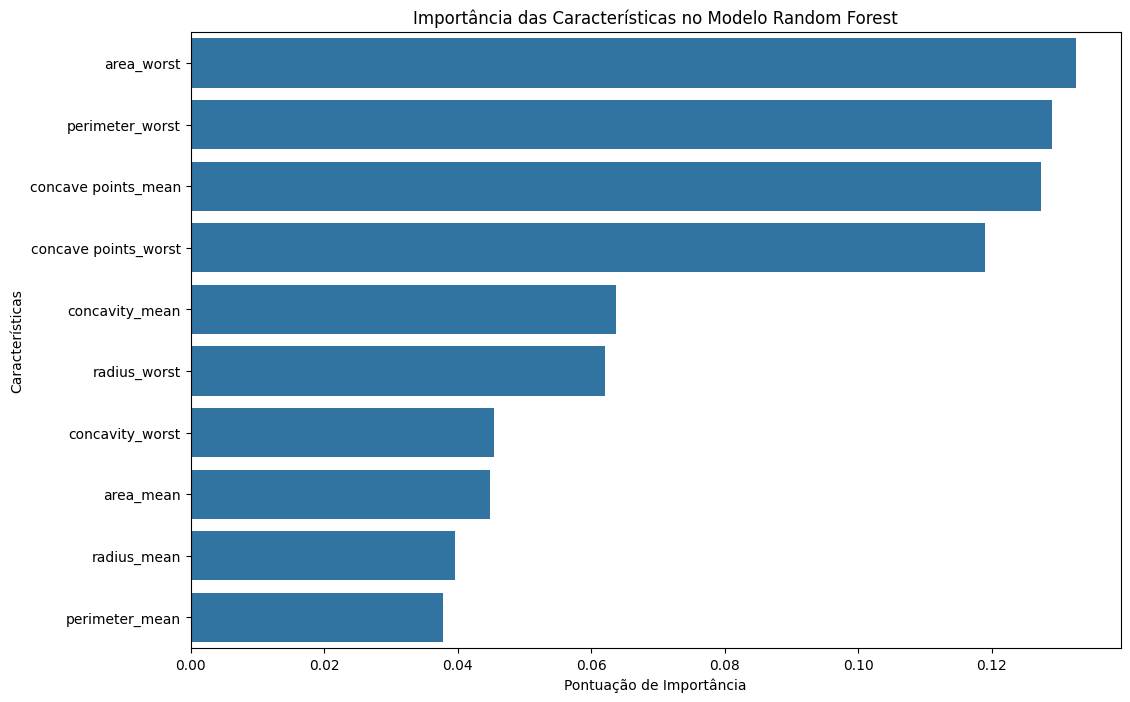

In [17]:
# Acessa a importância de cada característica
importances = optimized_model_smote.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Exibindo as 10 características mais importantes
print("Top 10 Características mais importantes:\n", feature_importances.head(10))
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.head(10), y=feature_importances.head(10).index)
plt.title('Importância das Características no Modelo Random Forest')
plt.xlabel('Pontuação de Importância')
plt.ylabel('Características')
plt.show()

In [18]:
# Próximo modelo: GradienteBossting
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbt_model.fit(X_train_res, y_train_res)
y_pred_gbt = gbt_model.predict(X_test)

# Exibe as métricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"Acurácia do modelo Gradient Boosting: {accuracy_score(y_test, y_pred_gbt):.2f}")
print("\nMatriz de Confusão com Gradient Boosting:\n", confusion_matrix(y_test, y_pred_gbt))
print("\nRelatório de Classificação com Gradient Boosting:\n", classification_report(y_test, y_pred_gbt))

Acurácia do modelo Gradient Boosting: 0.96

Matriz de Confusão com Gradient Boosting:
 [[70  1]
 [ 3 40]]

Relatório de Classificação com Gradient Boosting:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# O modelo obteve performace identica ao RandomForest.
    Treinaremos agora um modelo SVM


In [23]:
# SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_res, y_train_res)

# Métricas do modelo
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia do modelo SVM: {accuracy_svm:.2f}")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nMatriz de Confusão do SVM:\n", conf_matrix_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
print("\nRelatório de Classificação do SVM:\n", class_report_svm)

Acurácia do modelo SVM: 0.95

Matriz de Confusão do SVM:
 [[70  1]
 [ 5 38]]

Relatório de Classificação do SVM:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



# Com o modelo SVM também obtendo uma performace inferior ao esperado, partiremos para o VotingClassifier

In [25]:
'''from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_res, y_train_res)
print("Modelo SVM treinado com sucesso!")
from sklearn.ensemble import VotingClassifier
estimators = [
    ('random_forest', optimized_model_smote),
    ('gradient_boosting', gbt_model),
    ('svm', svm_model)
]

print("Treinando o modelo Ensemble (Voting Classifier)...")
ensemble_model = VotingClassifier(estimators=estimators, voting='soft')
ensemble_model.fit(X_train_res, y_train_res)
print("Modelo Ensemble treinado com sucesso!")

# Passo 3: Avaliar o desempenho do Ensemble
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_ensemble = ensemble_model.predict(X_test)
print(f"\nAcurácia do modelo Ensemble: {accuracy_score(y_test, y_pred_ensemble):.2f}")
print("\nMatriz de Confusão do Ensemble:\n", confusion_matrix(y_test, y_pred_ensemble))
print("\nRelatório de Classificação do Ensemble:\n", classification_report(y_test, y_pred_ensemble))'''

Treinando novo modelo SVM com 'probability=True'...
Modelo SVM treinado com sucesso!
Treinando o modelo Ensemble (Voting Classifier)...
Modelo Ensemble treinado com sucesso!

Acurácia do modelo Ensemble: 0.96

Matriz de Confusão do Ensemble:
 [[70  1]
 [ 3 40]]

Relatório de Classificação do Ensemble:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Após a realização do Voting, o modelo Random Forest com classes balanceadas ainda foi o modelo com melhor desempenho.

# Resumo Final do projeto:
    O modelo inicial já era muito bom: O Random Forest, com as características do conjunto de dados, foi a escolha mais eficaz desde o início.

    O ajuste de hiperparâmetros não foi a solução: A performance do modelo não estava limitada por seus parâmetros, mas sim pela distribuição dos dados.

    O balanceamento de classes foi a chave: O uso do SMOTE para equilibrar a classe Maligno foi o único passo que realmente reduziu os falsos negativos e melhorou o Recall, o que era prioridade.

    Outros modelos não superaram o melhor: Nem o Gradient Boosting, nem o SVM, nem mesmo o Ensemble foram capazes de oferecer um desempenho superior ao do Random Forest + SMOTE.